# Lab 11: Introduction to Neural Networks

## Announcements:

For lab grade today please submit what you have at the end of class for completion grade. If you missed a piece or have questions afterwards, please still submit what you have at the end of class but we would love for you to stay back for office hours directly after to go over in more detail.

This lab is essentially copy-paste the first part of your project. Please code-along in class and ensure what you have is correct and that you understand it. We will be building on this code next week and will not be uploading the code to canvas. If you have questions or need help we have office hours and can be reached by email.

## For next lab:
    * Once the project is released, you should aim to complete the following pieces of your project:
    1. Define your network architecture (correct number of input, hidden, and output nodes.)
    2. Set up your Activation functions (ReLU, Sigmoid)
    3. Set up your Activation function derivatives (ReLU, Sigmoid)
    4. Set up your forward_propogation and output functions.
    5. Set up your weight initialization (random)
    6. Set up your cost function (mse)

The project will have you first define these functions as we have in this lab, but afterwards, you will have to make minor modifications to each. For example, you may define a new activation function option or add a new layer to your network.

It is ok if you don't fully complete these by next lab but after this lab you will have the resources needed to do so (this lab, past projects, past labs) and it will keep you on track for completing your project correctly and on time (it is 20% of your total grade).

You can refer to this code for help: https://canvas.its.virginia.edu/courses/139807/files/search?search_term=NN_

## Agenda(s):

### Lab 11:

- Introduction to NN, triangular example for regression tasks

- Acivation Functions (Sigmoid and ReLU)

- Feedforward Function

- Output/Prediction Function

- Initialization of Weights

- Cost Function

- Gradients

### Lab 12:

- Introduction to Project 4

- Backpropogation

- Learning rate

- Epochs

- Training and Testing Model

- Introduction to NN for a classification task

    - Setting up and timing experiments


### Lab 13 and 14:

- Clarifications, Questions

- In-lab work

# **Lab 11**

### Today:

Our goal for today is to create a very simple neural network from scratch. The network will take an input of 100 values evenly spaced from -1 to 2. The network will be trained with 1 layer of weights to create an output from the values between -1 to 2 that make the desired triangle shape.

### Project:

For the project, you will build off of the functions we create here to create an expanded neural network. The network will have 2 layers and 4 input nodes. These input nodes align with the 4 penguin measurements from the penguin data we saw at the beginning of the semester. There will be one output node that predicts the binary pengin species label.


In [1]:
# The only libraries we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Our goal is to model this simple neural network below. It has 1 input node, 1 hidden layer with 2 nodes, and finally one output node.

![small NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN.png?raw=true)

We start by defining what we want our network to look like. We can start by defining the number of `input node`, `hidden nodes` per hidden layer, and `output nodes`.

**Question:** How many input nodes do we have? Hidden nodes? Output nodes? Note: Talking about individual nodes, not layers.

In [2]:
# Define the number of input, hidden, and output nodes (note: nodes not layers)
input_nodes = 1
hidden_nodes = 2
output_nodes = 1

**Conceptual Question:** How many hidden layers are in the network? Note: Hidden layers are in between the input and output layers.

### Our Goal

We want to find a neural netwrok that approximates the `traingular function`. The `triangular function` can be defined as the following piecewise function:

$$
f(x) = \begin{cases}
0 & x \leq 0 \\
2x & 0<x<0.5 \\
2-2x & 0.5 \leq x <1 \\
0 & 1 \leq x  \end{cases}
$$

We define a function for the triangular function as:

In [3]:
def tri(x):
  return 2*x*(x>0)*(x<.5)+(2-2*x)*(x>=.5)*(x<1)

**Question:** Plot what our original data looks like, $X \in [-1, 2]$,  next to what the triangular function transforms our data into (the triangle).

Remember, we can think of the function as a `transformation`. We have some data, $X \in \mathbb{R}$. This can be any values on the real number line. For this example, we are choosing 100 values between -1 and 2. The triangular function, `f(x)`, transfers our data, `X`, to some new space, $y \in \mathbb{R}$. All functions can be thought of as a transformation.

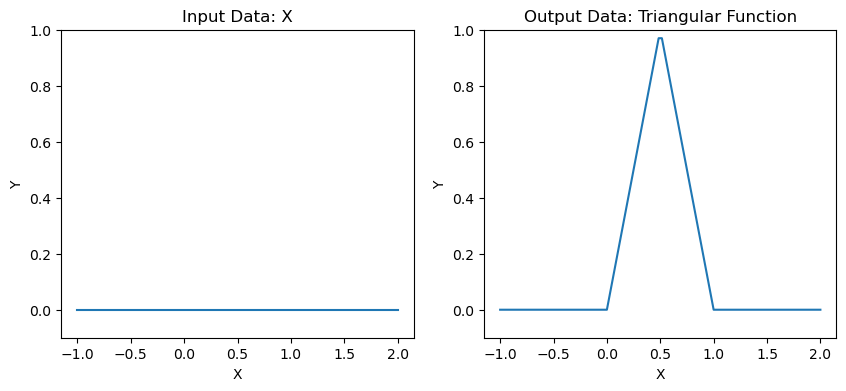

In [4]:
# now we can plot what the triangular function looks like

X = np.linspace(start=-1, stop =2, num=100) #fill in (https://numpy.org/doc/2.1/reference/generated/numpy.linspace.html)
y = tri(X) #fill in
########################

### Plotting the triangular function ###
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].plot(X, np.zeros_like(X))
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_ylim([-0.1, 1])
ax[0].set_title('Input Data: X')

ax[1].plot(X,y)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_ylim([-0.1, 1])
ax[1].set_title('Output Data: Triangular Function')

plt.show()

# Creating the Network

## **Activation Functions**

For a neural network. We can have a variety of different activaiton functions. The first activation function used was the `sigmoid` function. This function convinietly transforms any number into a number between 0 and 1. The `sigmoid` activation function is defined as:

\begin{gather}
  \sigma(x) = \frac{1}{1 + e^{-x}}
\end{gather}

`Sigmoid` has some computaitonal issues and limitaitons that make it not so suitable for all tasks. For this reason, other activation functions were develped. The most popular activation function is `ReLU` (rectified linear unit). The `ReLU` activation function is defined as:

\begin{gather}
  \sigma(x) = \begin{cases}
    x, & x > 0 \\
    0, & x \leq 0
  \end{cases} = max(0, x)
\end{gather}

**Question:** Define 2 functions below. One should be `sigmoid(x)` and should calculate the sigmoid transformation of some data x. The second function should be `relu(x)`. It should transform our data, x, using the relu transformation.

In [5]:
# define a function sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))      #fill in

# define a ReLU
def relu(x):
  return   x*(x>0)   #fill in

**Question:** Visualize what the result of your `sigmoid(x)` and `relu(x)` functions are for some data $X \in [-10, 10]$

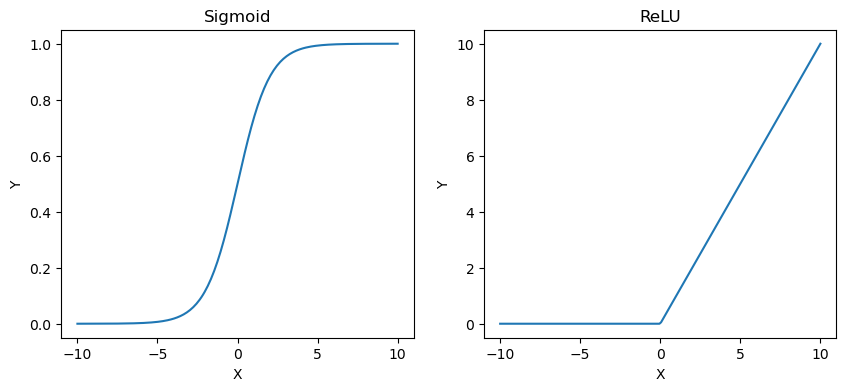

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

X = np.linspace(-10, 10, 200)
sig_vals = sigmoid(X)
relu_vals = relu(X)

ax[0].plot(X, sig_vals)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Sigmoid')

ax[1].plot(X, relu_vals)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('ReLU')

plt.show()

**Question:** Combined both functions `relu(x)` and `sigmoid(x)` into another function called `ActivationFxn(x, activation_type = None)`. The function should take in a parameter, `x`, to transform, and another parameter, `activation_type`, that defines which activation function to use. For now, the `activation_type` can be either `sigmoid` or `relu`.

In [7]:
# Combine into one placeholder
def ActivationFxn(x, activation_type = None):
  if activation_type == 'relu':
    return    relu(x)            #fill in
  elif activation_type == 'sigmoid':
    return    sigmoid(x)            #fill in
  else:
    print('Error: Acitvation Function Type not valid')

After defining the activation function, $\sigma$, we need to define its derivative. Why? So that we can calculate the `backpropogration` to update our weights. This is how our network learns.

The derivative of the Sigmoid function is written as:

\begin{gather}
  \sigma^\prime (x) = \sigma(x) * (1 - \sigma(x))
\end{gather}

The derivative of ReLU can be written as:

\begin{gather}
  \sigma^{\prime}(x) = \begin{cases} 1, & x > 0 \\ 0, & x \leq 0 \end{cases}
\end{gather}

**Question:** Define a function called `ActivationFxnDerivative(x, activation_type)` that returns the derivative at some point, `x`, for some activation function, `activation_type`. `activation_type` can again be either `sigmoid` or `relu` for now.

In [8]:
# Define the derivative of the activation function
def ActivationFxnDerivative(x, activation_type = None):
  if activation_type == 'relu':
    return   1*(x>0)             #fill in (calculate the derivative of relu)
  elif activation_type == 'sigmoid':
    return    sigmoid(x)*(1-sigmoid(x))            #fill in (calculate the derivative of sigmoid) the chain rule
  else:
    print('Error: Acitvation Function Type not valid')

To view how our activation functions look and their derivative, we can create some data. First, we'll create 200 values of $X \in [-10, 10]$. Then calcualte the values once passed into our activation function, $\sigma(x)$. Lastly, we want to calculate what the derivative, $\frac{\partial \sigma}{\partial x}$, of our activation function, $\sigma(x)$, function is at each value of x.

In [9]:
# Generate a range of 200 values from -10 to 10 to plot
x_values =  np.linspace(-10,10,200)    #fill in (https://numpy.org/doc/2.1/reference/generated/numpy.linspace.html)

sigmoid_activation_values = ActivationFxn(x_values, 'sigmoid') #fill in
sigmoid_activation_derivative_values = ActivationFxnDerivative(x_values, 'sigmoid') #fill in

relu_activation_values = ActivationFxn(x_values, 'relu') #fill in
relu_activation_derivative_values = ActivationFxnDerivative(x_values, 'relu') #fill in

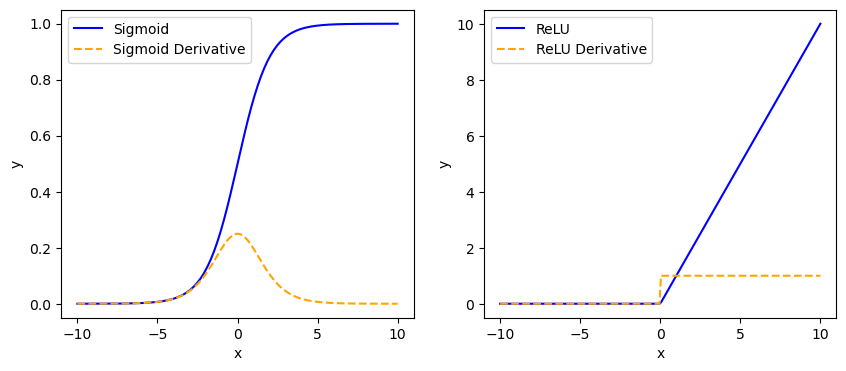

In [10]:
#from re import A
# Plotting both functions and their derivatives from -10 to 10

fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].plot(x_values, sigmoid_activation_values, label = 'Sigmoid', color = 'blue')
ax[0].plot(x_values, sigmoid_activation_derivative_values, label = 'Sigmoid Derivative', color = 'orange', linestyle = '--')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

ax[1].plot(x_values, relu_activation_values, label=r'ReLU', color='blue')
ax[1].plot(x_values, relu_activation_derivative_values, label=r'ReLU Derivative', color='orange', linestyle='--')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()

## **Foward propogation**

Next, we will start to define the network itself. From our provided image, we know that we start by moving from our input layer to our hidden layer. Then, we go from our hidden layer to our output layer. This involves two seperate calculations.

We can write the transfer from the input layer to the hidden layer as in the image below:
![LHS NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_LHS.png?raw=true)

Likewise, we can write the transfer from the hidden layer to the output layer as in the image below:

![RHS NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_RHS.png?raw=true)



**Question:** From the images above, define a function `forward_propogation(x, activation_type)` that calculates the forward propogation of the entire network. It should do both transformations, i.e. 1. from input to hidden and 2. hidden to output. Return the output of both calculations. Follow the formula above to define `z1`, `a1`, `z2`, and `a2`. Then return `a1`, `a2`, `z1`, `z2`. Remember that the `ActivationFxn()` is the sigma in the figure above.

In [11]:
# Define the forward propagation function
def forward_propagation(x, activation_type):
  # 1. Define the Input layer to Hidden Layer (1st image)
  z1 =   np.dot(W1,x) + b1              #fill in
  a1 = ActivationFxn(z1, activation_type) #fill in

  # 2. Define the Hidden Layer to Output Layer (2nd image)
  z2 =    np.dot(W2, a1) +b2             #fill in
  a2 = ActivationFxn(z2, activation_type) #fill in

  # 3. return the outputs of both layers
  return    a1, a2, z1, z2           #fill in

## **Output/Prediction Function**

**Question:** Create a new function called `output(X, activation_type)` that takes in a data array, `X`. It should loop over each row of the array, `X`. For each row or sample, calculate the forward propogation using the function you defined above. Catch both elements that the `forward_propogation` function returns. Save the final output from the output layer, `a2`, into a list. The `output()` function should ultimately return this list of outputs. For a sanity check, you can make sure that the output list is the same length as the number of columns in `X`.

In [12]:
# Evaluate the output y based on the forward propagation
def output(X, activation_type):
  # 1. Define an empty array (out) to append each value for each sample in the data
  out = np.array([])

  # 2. Loop over each sample of X
  for j in range(X.shape[0]):

      # 3. Select an element and reshape so that it is input_nodes x 1
      x =   X[j].reshape(input_nodes,1)               #fill in

      # 4. Pass your value, x, through the forward propogation function
      a1, a2, z1, z2 = forward_propagation(x, activation_type)                  #fill in

      # 5. Append your final result from the forward propogation to the out list
      out = np.append(out, a2)                  #fill in
  return out

## **Initialize Weights**


For this example, we're going to start with specified values for the weights so that we converge more quickly for live demonstartion purposes. In general, we would want to start with randomized weights before training.

When thinking about these weights and biases, you can think of them as the specific part of our model that is transforming our data to the desired output. As such, these are what we will be changing, or fine-tuning, within our model at each training iteration (epoch) to get to our ultimate goal.


In [13]:
# Define your weights to start
### CODE GIVEN ###
W1 = np.array(
    [[1.5],
     [1.5]]
)
# W1 = np.random.randn(hidden_nodes, input_nodes)

b1 = np.array(
    [[0.8],
     [-.5]]
)
# b1 = np.zeros((hidden_nodes, 1))

W2 = np.array(
    [[1.0,
      -2.4]]
)
# W2 = np.random.randn(output_nodes, hidden_nodes)

b2 = np.array(
    [[1.0]]
)
# b2 = np.zeros((output_nodes, 1))

**Question:** Let's compare how our model is at intialization when compared to the target function we want. This is a starting point that we will manipulate to get closer to our desired output. Specify `relu` as the activation type for now.

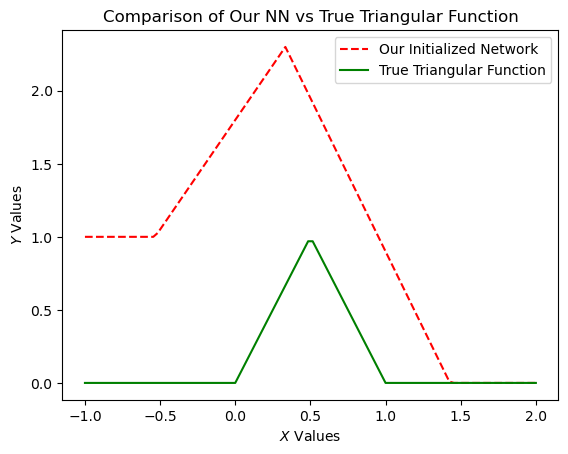

In [14]:
# we define our data
X = np.linspace(start=-1, stop=2,num=100)

# we calculate the output of our network as a function
Y_hat = output(X, activation_type = 'relu') #fill in

# Now we calculate what our truth looks like (triangle function)
Y =      tri(X)            #fill in

# We plot our network when initialized at first
plt.plot(X,Y_hat, color = 'red', label="Our Initialized Network", linestyle = '--')
plt.plot(X, Y, color = 'green', label = 'True Triangular Function')
plt.xlabel(r'$X$ Values')
plt.ylabel(r'$Y$ Values')
plt.title('Comparison of Our NN vs True Triangular Function')
plt.legend()
plt.show()

## **Cost Function**

Next, we will define the `cost` function. This tells us how close we are to our goal. Think back to linear regression, where we calculated the *Mean Squared Error* of our predictions. We can use the same formula here.

**Question:** Create a function `mse(y, y_hat)` using the formula for MSE. `y` is the true value while `y_hat` is the prediction of our network.

\begin{gather}
  \text{mse}(x) = \frac{1}{2n} \sum (y - y\_\text{hat})^2
\end{gather}

In [15]:
# define MSE function
def mse(y, y_hat):
  return   0.5*np.sum(y-y_hat)**2/y.shape(0)               #fill in

## **Gradients**

We need some way to update our weights. We do this using the gradient and back propogation.

![partial derivatives](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_gradients.png?raw=true)

What do we need to calculate then?

**Question:** Define a function called `gradient(x, y, a1, a2,activation_type)`

The function should take in:
- the data `x`
- the true label, `y`
- the output of the first transformation after activation, `a1`
- the output of the second transformation after activation, `a2`
- the output of the first transformation before activation, `z1`
- the output of the second transformation after activation, `z2`
- the desired activation type, `activation_type`

The function should return the change in weights (the gradient) for `W1`, `b1`, `W2`, and `b2`.  

In [ ]:
# Define the gradient function
def gradient(x, y, a1, a2, z1, z2, activation_type):
  # Find the derivative of the second part
  delta2 =                  #fill in
  dW2 =                  #fill in
  db2 = delta2

  # Find the derivative of the first part
  delta1 =                  #fill in
  dW1 =                  #fill in
  db1 = delta1

  # return each of the derivatives
  return dW1, db1, dW2, db2